In [1]:
# -*- coding: UTF-8 -*-

# Render our plots inline
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib
import numpy as np
import seaborn as sns
import shutil

from textwrap import wrap

pd.set_option('display.max_columns', None) # Display all the columns

sns.set()
#sns.set_style("whitegrid") # Seaborn style


In [3]:
data = pd.read_csv("csv/results.csv")

In [4]:
columns = ['Q47[SQ001]','Q47[SQ002]','Q47[SQ003]','Q47[SQ004]','Q47[SQ005]','Q47[SQ006]','Q47[SQ007]']
columns_names = [
    "Improve the design of open and collaborative projects",
    "Improve the manufacturing of open and collaborative projects",
    "Improve the supply chains of open and collaborative projects",
    "Improving the organization, coordination and collaboration within the networks of Maker laboratories (Fab Lab, Makerspace, Hackerspace, ...)",
    "Connecting more people with a single Maker laboratory (Fab Lab, Makerspace, 1 Hackerspace, ...)",
    "Improving the organization, coordination and collaboration within a single Maker laboratory (Fab Lab, Makerspace, Hackerspace, ...)",
    "Improving the collaboration of Maker laboratories (Fab Lab, Makerspace, Hackerspace, ...) with non-maker organizations (companies, craftsmen, universities, workshops, associations, ... )",
]
options = [
    'Yes',
    'No',
]
profile = data[columns]

In [5]:
profile.columns = columns_names

In [6]:
profile2 = profile.apply(pd.Series.value_counts).fillna(0).transpose()

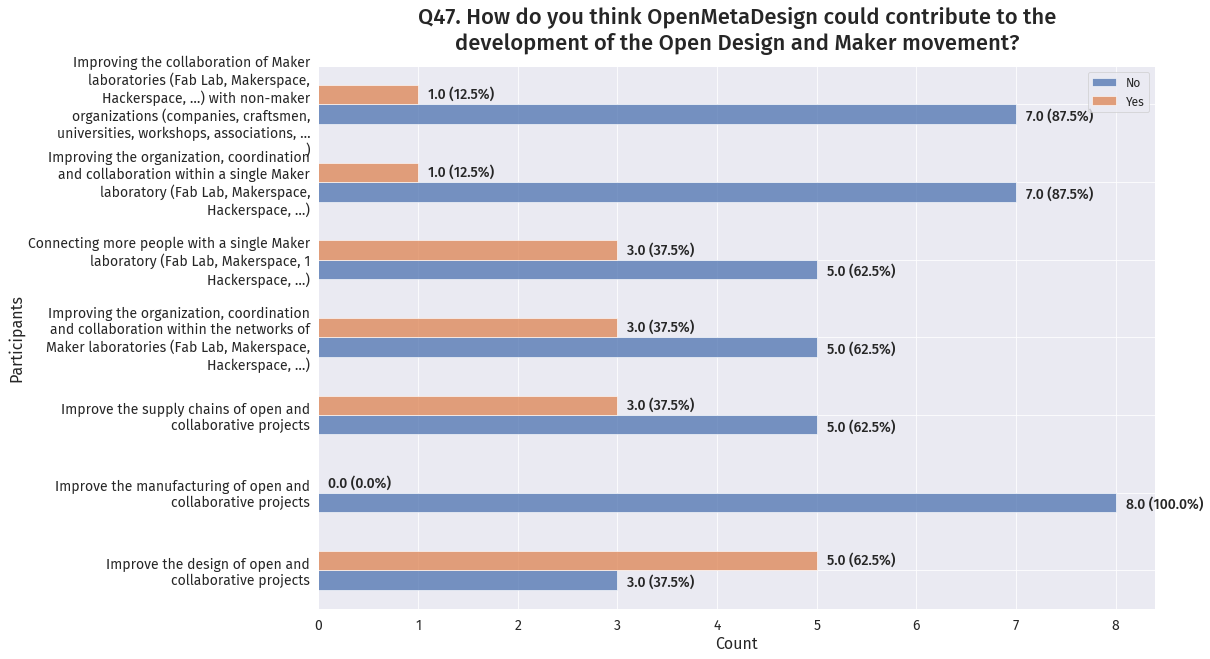

In [7]:
# Configure font
matplotlib.rcParams['font.sans-serif'] = "Fira Sans"
matplotlib.rcParams['font.family'] = "sans-serif"
sns.set_context("paper")
# Plot the data
ax = profile2.plot(kind='barh', alpha=0.75, rot=0, figsize=(15,10))
plt.xlabel('Count', fontsize=16)
plt.ylabel('Participants', fontsize=16)
title = "Q47. How do you think OpenMetaDesign could contribute to the development of the Open Design and Maker movement?"
plt.title("\n".join(wrap(title, 70)), fontsize=22, y=1.02, fontname='Fira Sans', fontweight="500")
labels = ['\n'.join(wrap(l, 42)) for l in profile2.index]
plt.yticks(range(len(labels)), labels, fontsize=14)
plt.xticks(fontsize=14)
for i in range(len(profile2)):
    this_total = profile2.iloc[i]['Yes'] + profile2.iloc[i]['No'] * 1.0
    plt.text(profile2.iloc[i]['Yes'] + .1, i+.08, str(profile2.iloc[i]['Yes'])+" ("+str(profile2.iloc[i]['Yes']/this_total * 100.0)+"%)", fontweight='500', fontsize=14)
    plt.text(profile2.iloc[i]['No'] + .1, i-.2, str(profile2.iloc[i]['No'])+" ("+str(profile2.iloc[i]['No']/this_total * 100.0)+"%)", fontweight='500', fontsize=14)
ax.legend(fontsize=12)
plt.savefig("svg/Q47.svg", bbox_inches="tight")
plt.savefig("png/Q47.png", dpi=300, bbox_inches="tight")